In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pylab as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
compressed_files = np.load('CWRU_48k_load_1_CNN_data.npz')
print(compressed_files.files)

['data', 'labels']


In [3]:
classes_orig = compressed_files['labels']
data = compressed_files['data']
print('size of array classes:',classes_orig.shape)
print()
print('size of array data:',data.shape)
print()
print('random classes ',classes_orig)
print()
unique_classes = np.unique(classes_orig)
print('unique labels',unique_classes)

# ENCODING + catogarizing classes acccording to their unique labels  
classes = pd.Categorical(classes_orig, categories=unique_classes).codes
print(classes)

size of array classes: (4600,)

size of array data: (4600, 32, 32)

random classes  ['Ball_007' 'Ball_007' 'Ball_007' ... 'Normal' 'Normal' 'Normal']

unique labels ['Ball_007' 'Ball_014' 'Ball_021' 'IR_007' 'IR_014' 'IR_021' 'Normal'
 'OR_007' 'OR_014' 'OR_021']
[0 0 0 ... 6 6 6]


In [4]:
data_train, data_test, classes_train, classes_test = train_test_split(data,classes, test_size=0.2, random_state=729,stratify=classes)

#for cross validation check dividing training data again

data_train, data_valid, classes_train, classes_valid = train_test_split(data_train,classes_train, test_size=0.2, random_state=342,stratify=classes_train)


In [5]:
# reshaping data
data_train = data_train.reshape(-1,32,32,1)
data_valid = data_valid.reshape(len(data_valid),32,32,1)
data_test = data_test.reshape(-1,32,32,1)

from keras.utils import to_categorical
classes_train = to_categorical(classes_train)
classes_test = to_categorical(classes_test)
classes_valid = to_categorical(classes_valid)

# Shuffling our data
index = np.random.permutation(len(classes_train))
data_train, classes_train = data_train[index], classes_train[index]

print('training data shape: ', data_train.shape)
print('validation data shape: ', data_valid.shape)
print('testing data shape: ', data_test.shape)
print('training classes shape: ', classes_train.shape)
print('validation classes shape: ', classes_valid.shape)
print('testing classes shape: ', classes_test.shape)



training data shape:  (2944, 32, 32, 1)
validation data shape:  (736, 32, 32, 1)
testing data shape:  (920, 32, 32, 1)
training classes shape:  (2944, 10)
validation classes shape:  (736, 10)
testing classes shape:  (920, 10)


In [16]:
#reshaping
Valid_data = data_valid.reshape(-1,32)  
dataframe = pd.DataFrame(classes_valid)
dataframe2 =  pd.DataFrame(Valid_data)
dataframe.to_csv('labels.csv',index=False)
dataframe2.to_csv('data.csv',index=False)




In [21]:

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, SimpleRNN, Conv2D, MaxPooling2D, Flatten

In [22]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=9, activation='relu', input_shape = (32,32,1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=9, activation='relu'))
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(96, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 32)        2624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 32)          82976     
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 32)          0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)               

In [31]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

N_Network = model.fit(data_train , classes_train, epochs=30, batch_size=128, validation_data=(data_valid, classes_valid)) 


Epoch 1/30
23/23 [==============================] - 2s 83ms/step - loss: 0.0516 - accuracy: 0.9803 - val_loss: 0.0997 - val_accuracy: 0.9728
Epoch 2/30
23/23 [==============================] - 1s 62ms/step - loss: 0.0306 - accuracy: 0.9915 - val_loss: 0.1303 - val_accuracy: 0.9579
Epoch 3/30
23/23 [==============================] - 1s 64ms/step - loss: 0.0234 - accuracy: 0.9939 - val_loss: 0.0912 - val_accuracy: 0.9728
Epoch 4/30
23/23 [==============================] - 1s 64ms/step - loss: 0.0180 - accuracy: 0.9946 - val_loss: 0.1093 - val_accuracy: 0.9701
Epoch 5/30
23/23 [==============================] - 2s 76ms/step - loss: 0.0225 - accuracy: 0.9929 - val_loss: 0.1027 - val_accuracy: 0.9674
Epoch 6/30
23/23 [==============================] - 2s 93ms/step - loss: 0.0154 - accuracy: 0.9966 - val_loss: 0.0815 - val_accuracy: 0.9742
Epoch 7/30
23/23 [==============================] - 2s 83ms/step - loss: 0.0106 - accuracy: 0.9980 - val_loss: 0.0965 - val_accuracy: 0.9715
Epoch 8/30
23

In [32]:
model.save("raw_cnn.h5")

In [33]:

import time

start = time.time()
model.evaluate(data_test,classes_test, batch_size = 128, verbose = 0)
end = time.time()
print(end - start)


0.18387579917907715


In [34]:
model.evaluate(data_test,classes_test, batch_size = 128, verbose = 0)

[0.06548968702554703, 0.9858695864677429]

In [26]:
prediction = model.predict(data_test)
prediction_classes = list([])
for each_prediction in prediction:
    prediction_classes.append(list(each_prediction).index(max(each_prediction)))

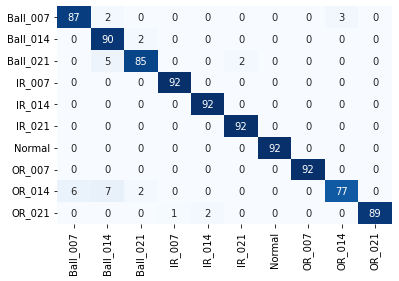

In [27]:
from sklearn.metrics import confusion_matrix
true_classes = np.argmax(classes_test, axis = 1)
matrix = confusion_matrix(true_classes, prediction_classes)

import seaborn as sns
matrix = pd.DataFrame(matrix)
plt.figure()
sns.heatmap(matrix, annot= True, fmt = "d",
           xticklabels = unique_classes,
           yticklabels = unique_classes, cmap = "Blues", cbar = False)
plt.xticks()
plt.show()



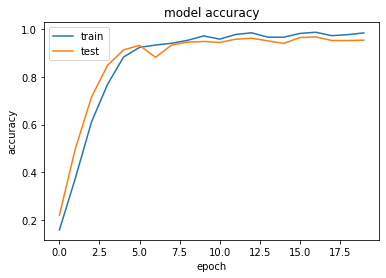

In [28]:
plt.plot(N_Network.history['accuracy'])
plt.plot(N_Network.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

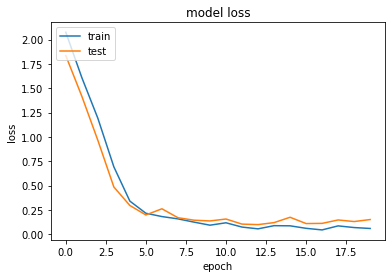

In [29]:
# summarize history for loss
plt.plot(N_Network.history['loss'])
plt.plot(N_Network.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()